In [1]:
%load_ext autoreload
%autoreload 2
from optimizers import Nesterov_Optimizers
from sklearn.datasets import fetch_california_housing, load_boston, load_diabetes

import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt 
    
%matplotlib inline

In [2]:
def get_coef_measures(X_train, y_train):
    Nesterov_accelerated = Nesterov_Optimizers()
    Nesterov_accelerated.fit(X_train, y_train, method="accelerated", verbose=True)
    acc_coef = Nesterov_accelerated.get_hist_coef()
    acc_measures = Nesterov_accelerated.get_objective_value()


    Nesterov_dual = Nesterov_Optimizers()
    Nesterov_dual.fit(X_train, y_train, method="dual_gradient", verbose=True)
    dual_coef = Nesterov_dual.get_hist_coef()
    dual_measures = Nesterov_dual.get_objective_value()


    Nesterov_gradient = Nesterov_Optimizers()
    Nesterov_gradient.fit(X_train, y_train, method="gradient", verbose=True)
    gradient_coef = Nesterov_gradient.get_hist_coef()
    gradient_measures = Nesterov_gradient.get_objective_value()
    
    return acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures

def get_rmse():
    gradient_rmse = [sqrt(mean_squared_error(np.dot(X_test, coef), y_test)) for coef in gradient_coef]
    dual_rmse = [sqrt(mean_squared_error(np.dot(X_test, coef), y_test)) for coef in dual_coef]
    acc_rmse = [sqrt(mean_squared_error(np.dot(X_test, coef), y_test)) for coef in acc_coef]
    
    return gradient_rmse, dual_rmse, acc_rmse

def get_imp_feat():
    gradient_feat=sum(gradient_coef[-1]!=0)
    dual_feat=sum(dual_coef[-1]!=0)
    acc_feat=sum(acc_coef[-1]!=0)
    return gradient_feat,dual_feat,acc_feat

In [3]:
def plot_rmse(gradient_rmse, dual_rmse, acc_rmse, title = "Title", xlim=None, ylim=None):
    fig, ax = plt.subplots()
    plt.rcParams['figure.figsize'] = (15,10)
    plt.rcParams['font.size'] = 20
    plt.rcParams['lines.linewidth'] = 4
    ax.title(title)
    ax.plot(gradient_rmse, c='g', ls='-', label='Gradient')
    ax.plot(dual_rmse, c='r', ls='--', label='Dual Gradient')
    ax.plot(acc_rmse, c='b', ls='-.', label='Accelerated')
    ax.legend()
    
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    
    if ylim:
        plt.ylim(ylim[0], ylim[1])

In [4]:
def plot_meassures(gradient_measure, dual_measure, acc_measure, title="Plot", xlim=None, ylim=None, mse=None):
    plt.rcParams['figure.figsize'] = (15,10)
    plt.rcParams['font.size'] = 20
    plt.rcParams['lines.linewidth'] = 4
    plt.title(title)
    plt.plot(gradient_measure, c='g', ls='-', label='Gradient')
    plt.plot(dual_measure, c='r', ls='--', label='Dual Gradient')
    plt.plot(acc_measure, c='b', ls='-.', label='Accelerated')
    plt.legend(title="Method")
    plt.ticklabel_format(useOffset=False, style='plain')
    if xlim:
        plt.xlim(xlim[0], xlim[1])
    
    if ylim:
        plt.ylim(ylim[0], ylim[1])
    
    plt.xlabel("Iteration")
    if mse==1:
        plt.ylabel("Mean Squared Error")
    elif mse==2:
        plt.ylabel("Root Mean Squared Error")
    else:
        plt.ylabel("Objective function")
        
    #plt.savefig(f"fig/{title}.png")    
    plt.show()

### Problem 1

In [5]:
n_samples=500
n_features=50
n_informative=20
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                     )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

accelerated  early stopping at  49
dual_gradient  early stopping at  23
gradient  early stopping at  23


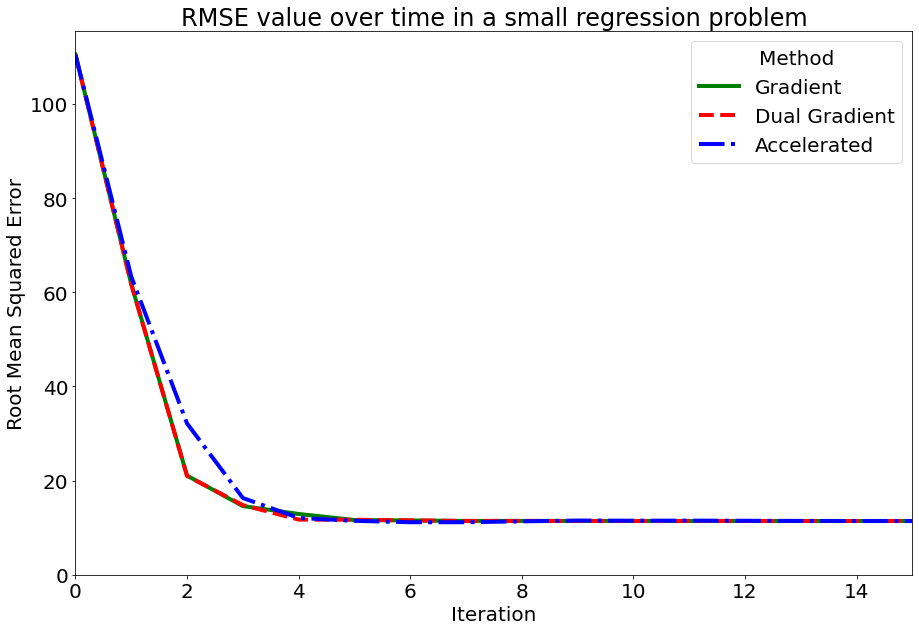

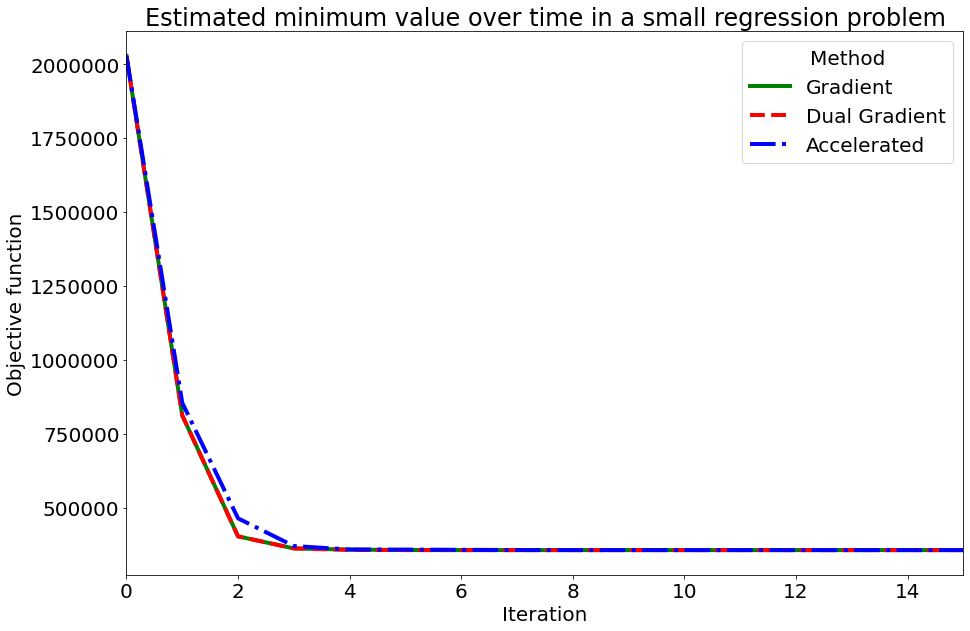

(20, 20, 20)


In [6]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()
plot_meassures(gradient_rmse, dual_rmse, acc_rmse, title="RMSE value over time in a small regression problem", xlim=[0, 15], ylim=[0, None], mse=2)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Estimated minimum value over time in a small regression problem", xlim=[0, 15])
print(get_imp_feat())

### Problem 2

In [7]:
n_samples=5000
n_features=500
n_informative=125
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                      )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

accelerated  early stopping at  65
dual_gradient  early stopping at  26
gradient  early stopping at  20


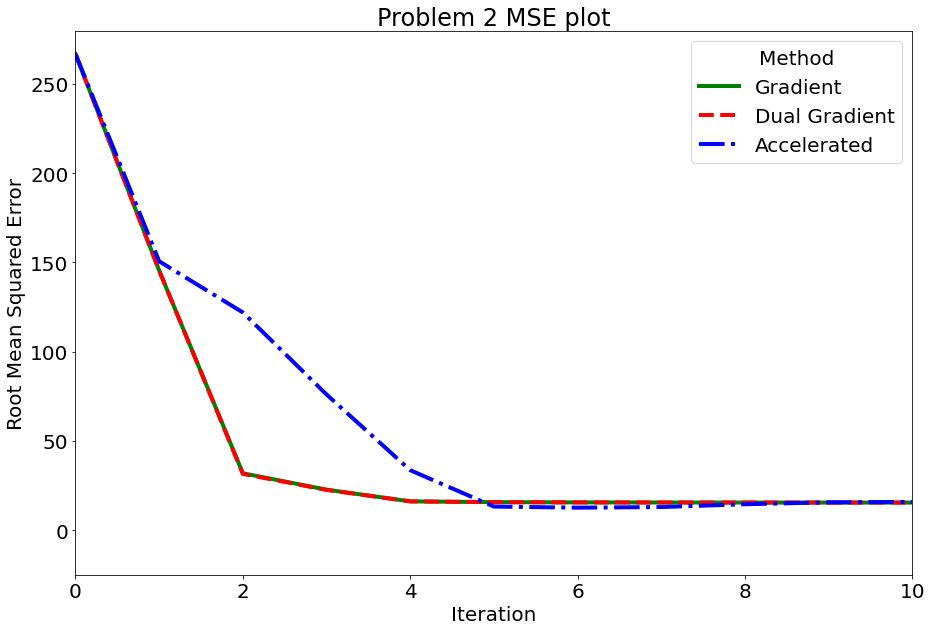

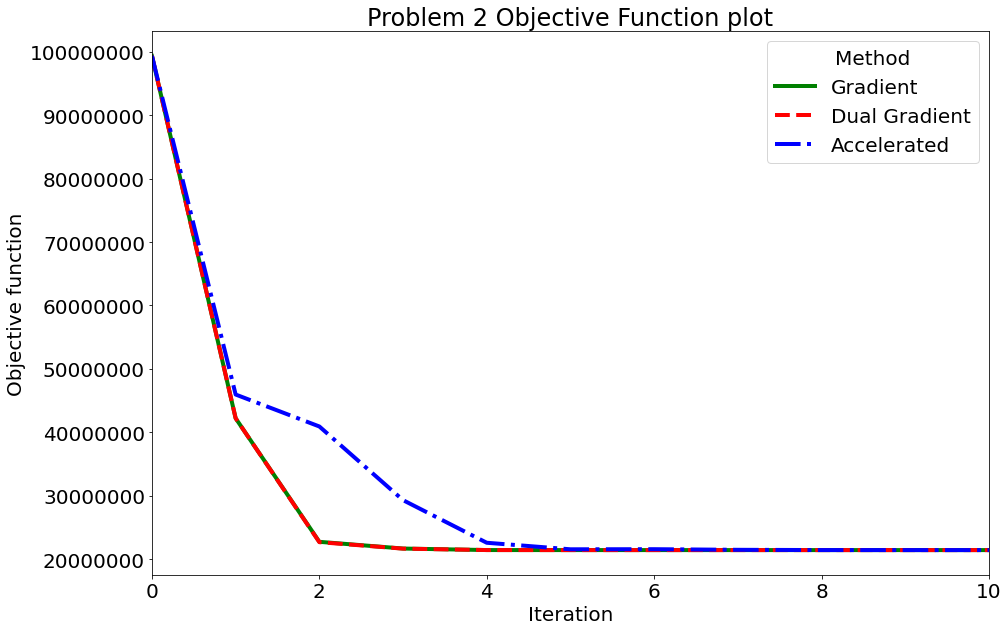

(123, 123, 123)


In [8]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()

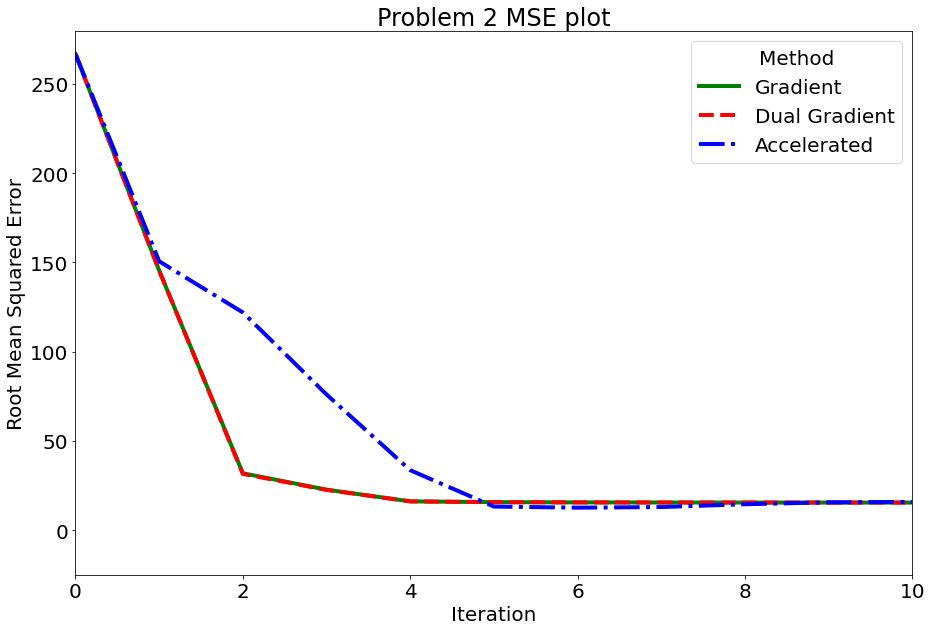

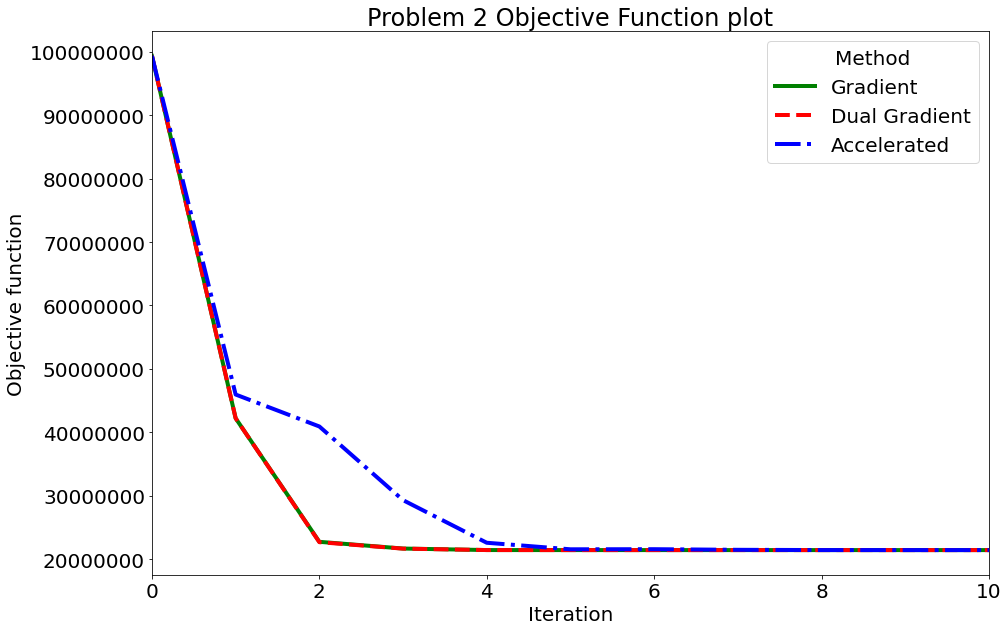

(123, 123, 123)


In [9]:
plot_meassures(gradient_rmse, dual_rmse, acc_rmse, title="Problem 2 MSE plot", xlim=[0, 10], ylim=[-25, None], mse=2)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 2 Objective Function plot", xlim=[0, 10])
print(get_imp_feat())

### Problem 3

In [10]:
n_samples=20000
n_features=1000
n_informative=150
X, y, coef = datasets.make_regression(n_samples = n_samples,#number of samples
                                      n_features = n_features,#number of features
                                      n_informative = n_informative,#number of useful features
                                      noise = 10,#bias and standard deviation of the guassian noise
                                      coef = True #true coefficient used to generated the data
                                      )
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()

In [ ]:
plot_meassures(gradient_rmse, dual_rmse, acc_rmse, title="Problem 3 RMSE plot", xlim=[0, 10], ylim=[-25, None], mse=2)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 3 Objective Function plot", xlim=[0, 10])
print(get_imp_feat())

### Problem 4a

In [ ]:
X,y= load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()

In [ ]:
plot_meassures(gradient_rmse, dual_rmse, acc_rmse, title="Problem 6 MSE plot", mse=2)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 6 Objective Function plot",ylim=[5000,30000])
print(get_imp_feat())

### Problem 4b

In [ ]:
X,y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()

In [ ]:
plot_meassures(gradient_rmse, dual_rmse, acc_rmse, title="Problem 4 MSE plot", xlim=[0, 25], mse=2)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 4 Objective Function plot", xlim=[0, 25])
print(get_imp_feat())

### Problem 5

In [ ]:
# nwm może wines quality?

### Problem 6

In [ ]:
X,y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
acc_coef, acc_measures, dual_coef, dual_measures, gradient_coef, gradient_measures = get_coef_measures(X_train, y_train)
gradient_rmse, dual_rmse, acc_rmse = get_rmse()

In [ ]:
plot_meassures(gradient_rmse, dual_rmse, acc_rmse, title="Problem 5 MSE plot", mse=2)
plot_meassures(gradient_measures, dual_measures, acc_measures, title="Problem 5 Objective Function plot")
print(get_imp_feat())